# Summer School of Data Science - Split '17

# 1. Introduction to Machine Learning with TensorFlow

This hands-on session serves as an introductory course for essential TensorFlow usage and basic machine learning with TensorFlow. This notebook is partly based on and follow the approach of chapter 6 of the book "Deep Learning" by Ian Goodfellow, Yoshua Bengio and Aaron Courville, available at: http://www.deeplearningbook.org/.

Other useful tutorials exist in the form of Jupyter notebooks, some of which are:
- https://github.com/udacity/deep-learning
- https://github.com/DataScienceUB/DeepLearningfromScratch

This notebook covers basic TensorFlow usage concepts, which are then applied to elementary machine learning models like linear and logistic regression, and finally a simple multilayer perceptron is built and trained using the established TensorFlow concepts.

## Basic TensorFlow concepts

TensorFlow is an open source Python library which provides multiple APIs for buidling and evaluating computational graphs. These graphs can be used to represent any machine learning model, and TensorFlow provides methods for efficient optimization and evaluation of the models. The programmer's guide for TensorFlow can be found at https://www.tensorflow.org/programmers_guide/, and the full documentation is availale at https://www.tensorflow.org/api_docs/python/.

The import statement for TensorFlow programs is: `import tensorflow as tf`. This provides access to all TensorFlow APIs, classes, methods and symbols. 

In [2]:
import tensorflow as tf

KeyError: "Couldn't find field google.protobuf.EnumDescriptorProto.EnumReservedRange.start"

### Tensor

The basic concept behind TensorFlow is the tensor - an n-dimensional array of a base datatype. In TensorFlow it is represented by the `tf.Tensor` object which will produce a value when evaluated. A `tf.Tensor` object has a shape (which defines the structure of the elements) and a data type, shared by all the elements in the Tensor. The main types of tensors are:
- Constant
- Variable
- Placeholder

The [`tf.constant()`](https://www.tensorflow.org/api_docs/python/tf/constant) method creates a constant tensor, populated with values of a data type, specified by arguments `value`, `shape` (optional), [`dtype`](https://www.tensorflow.org/api_docs/python/tf/DType) (optional).

In [2]:
# create a TensorFlow constant tensor
t = tf.constant(5)
print(t)

Tensor("Const:0", shape=(), dtype=int32)


In [3]:
# create a TensorFlow constant of a specific data type and shape
t = tf.constant(7,shape=[2,3], dtype=tf.float32,name="const_tensor")
print(t)

Tensor("const_tensor:0", shape=(2, 3), dtype=float32)


However, any Tensor is only evaluated within a [`Session`](https://www.tensorflow.org/api_docs/python/tf/Session), which is the environment in which all tensors and operations are executed.

In [4]:
# create a TensorFlow session and evaluate the created constant
sess = tf.Session()
print(sess.run(t))

[[7. 7. 7.]
 [7. 7. 7.]]


Other very common and useful methods for creating tensors of constant value are [`tf.zeros()`](https://www.tensorflow.org/api_docs/python/tf/zeros) and [`tf.ones()`](https://www.tensorflow.org/api_docs/python/tf/ones).

In [5]:
# create a tensor of any shape populated with zeros and check within the session
t = tf.zeros([3,2,2])
print(sess.run(t))

[[[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]]


In [7]:
# create a tensor of any shape populated with ones and check within the session
t = tf.ones([3,3,3])
print(sess.run(t))

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


Tensors containing random values from various distribution can be created using a number of methods, with the most commonly used being [`tf.random_uniform()`](https://www.tensorflow.org/api_docs/python/tf/random_uniform) and [`tf.random_normal()`](https://www.tensorflow.org/api_docs/python/tf/random_normal).

In [8]:
# create a random tensor containing values from a uniform distribution between 10 and 20
t = tf.random_uniform([3,4,2], minval=10, maxval=20)
print(t)
print(sess.run(t))

Tensor("random_uniform:0", shape=(3, 4, 2), dtype=float32)
[[[16.081694 14.811726]
  [16.734398 16.960472]
  [18.185795 18.990849]
  [12.913514 14.466887]]

 [[15.973291 10.668613]
  [19.48914  11.029856]
  [19.619104 17.294209]
  [14.703115 18.45964 ]]

 [[12.731907 14.368357]
  [19.224705 15.475198]
  [18.700066 17.58522 ]
  [19.661974 17.912998]]]


Simple algebraic operations such as `+`,`-`,`/`,and `*` can be used with tensors in this form, or by calling [`tf.add()`](https://www.tensorflow.org/api_docs/python/tf/add), [`tf.subtract()`](https://www.tensorflow.org/api_docs/python/tf/subtract), [`tf.divide()`](https://www.tensorflow.org/api_docs/python/tf/divide), or [`tf.multiply()`](https://www.tensorflow.org/api_docs/python/tf/multiply). These are all element-wise, and defined for tensors of equal shapes and data-types. Tensors can be cast into a specific data type by calling [`tf.cast()`](https://www.tensorflow.org/api_docs/python/tf/cast).

In [9]:
# add a scalar to a tensor
a = tf.ones([3,2])
sess.run(a+3)

array([[4., 4.],
       [4., 4.],
       [4., 4.]], dtype=float32)

In [10]:
# subtract two tensors
a = tf.constant(4., shape=[2,3])
print(a)
b = tf.random_normal(shape=[2,3])
print(b)
sess.run(a-b)

Tensor("Const_1:0", shape=(2, 3), dtype=float32)
Tensor("random_normal:0", shape=(2, 3), dtype=float32)


array([[5.8827286, 2.6152134, 2.2992125],
       [4.9675827, 3.6724536, 4.582939 ]], dtype=float32)

In [14]:
# divide two integer tensors
a = tf.constant(4, shape=[2,3])
b = tf.constant(7, shape=[2,3])
print(sess.run(a/b))

[[0.57142857 0.57142857 0.57142857]
 [0.57142857 0.57142857 0.57142857]]


Other very useful operations include:
- Absolute value (modulus) - [`tf.abs()`](https://www.tensorflow.org/api_docs/python/tf/abs)
- Exponentiation with $e$ - [`tf.exp()`](https://www.tensorflow.org/api_docs/python/tf/exp)
- Square and other powers - [`tf.square()`](https://www.tensorflow.org/api_docs/python/tf/square) and [`tf.pow()`](https://www.tensorflow.org/api_docs/python/tf/pow)
- Matrix multiplication - [`tf.matmul()`](https://www.tensorflow.org/api_docs/python/tf/matmul)
- Transpose - [`tf.transpose()`](https://www.tensorflow.org/api_docs/python/tf/transpose)

In [17]:
# try out varied mathematical operations with various tensors
a = tf.exp(tf.random_normal(shape=[3,2]))
print(sess.run(a))
b = tf.matmul(a,tf.transpose(a))
print(sess.run(b))


[[0.20220752 0.53175145]
 [0.15884101 1.8823165 ]
 [0.28275767 0.52681345]]
[[1.78315   3.3601913 2.783585 ]
 [3.3601913 9.815719  6.3739433]
 [2.783585  6.3739433 4.710886 ]]


### Placeholders and Variables

Placeholders and Vairables are special kinds of tensors which are the essential building blocks of more complex data and computation streams. These are the most commonly used types of tensors in TensorFlow. 

A [Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) is a tensor which acts like a "promise" to provide a value at the evaluation of the computational graph. Placeholders are mostly used as input points in the computational graph where data will be provided. It will produce an error when evaluated, unless the value is fed to the session.

In [18]:
# create a placeholder and feed it a value in a session
a = tf.placeholder(dtype=tf.float32)
b = tf.exp(a)
print(b)
print(sess.run(b,feed_dict={a:5}))

# create two placeholders and a tensor implementing matrix multiplication 
x1 = tf.placeholder(dtype=tf.float32)
x2 = tf.placeholder(dtype=tf.float32)
y = tf.matmul(x1, x2)
print(sess.run(y,feed_dict={x1:[[1,2],[3,4]], x2:[[5,6],[7,8]]}))

Tensor("Exp_3:0", dtype=float32)
148.41316
[[19. 22.]
 [43. 50.]]


A [Variable](https://www.tensorflow.org/api_docs/python/tf/Variable) is a tensor which allows the addition of trainable parameters to the computational graph. Constants are intialized when created, as opposed to variables, which need to be initialized within the session (and the initialization procedure must be defined). Variables can be "manually" assigned a new value using [`tf.assign`](https://www.tensorflow.org/api_docs/python/tf/assign), and their state is kept within the session object. This is mostly used for model training, during which variables are changed within the optimization process. 

In [23]:
# create a variable, initialize it, and assign a new value within a session
sess = tf.Session()
a = tf.Variable(5)
print(a)
sess.run(tf.global_variables_initializer())
sess.run(a)
sess.run(tf.assign(a,6))
print(sess.run(a))

sess.close()

sess = tf.Session()
sess.run(tf.global_variables_initializer())
print(sess.run(a))


<tf.Variable 'Variable_4:0' shape=() dtype=int32_ref>
6
5


## Linear regression in TensorFlow

Linear regression is one of the simplest and most commonly used regression models. The multivariate linear regression can be written as: 

$$y = w^{T}x + b$$

where $y \in \mathbb{R}$ is the output, $w \in \mathbb{R}^{p}$ is a column vector containing $p$ weights for $p$ features in $x \in \mathbb{R}^{p}$, and $b \in \mathbb{R}$ is the bias. The parameters contained in $w$ and $b$ are also called coefficients and are trained by using a gradient descent algorithm.


### Exercise:

Let us build a univariate linear regression model for a simple problem, using the previously introduced TensorFlow concepts:
- The model input $x$ is a placeholder for data
- The trainable model parameters $w$ and $b$ are defined as TensorFlow Variables
- The model output $\hat{y}$ is a Tensor
- The obesrved output $y$ is also a placeholder, where data will be provided for training purpose

In [25]:
#define placeholders for data
x = tf.placeholder(dtype=tf.float32, shape=[None])
y = tf.placeholder(dtype=tf.float32, shape=[None])
#define model parameters as variables
w = tf.Variable(tf.random_normal(shape=()))
b = tf.Variable(tf.random_normal([]))
#create a tensor which calculates the model output
y_model = w*x+b

To train a model built in TensorFlow, a loss function needs to be defined, most commonly as a [reduction](https://www.tensorflow.org/api_guides/python/math_ops#Reduction) operation. An [optimizer](https://www.tensorflow.org/api_guides/python/train#Optimizers) object needs to be defined, and the [`minimize()`](https://www.tensorflow.org/api_docs/python/tf/train/Optimizer#minimize) method called in order to update the variables defined within the model to minimize the selected loss function. When creating optimizer objects, choices about the learning rate have to be made - these, in combination with the number of training epochs, can greatly influence the model training process. With the approapriate learning rate, the optimization can quickly converge.

In [28]:
#define the loss function as the mean of all squared errors (MSE)
loss = tf.reduce_mean(tf.square(y_model-y))
#create a gradient descent optimizer
optimizer = tf.train.GradientDescentOptimizer(0.1)
#create a train operation
train = optimizer.minimize(loss)

#generate data to train the regression
import numpy as np
x_train = np.random.normal(size=100)
y_train = 5*x_train + 10 + np.random.normal(size=100)
print(x_train, y_train)

#initialize variables, run 100 epochs of training algorithm
sess.run(tf.global_variables_initializer())
for epoch in range(100):
    sess.run(train, {y:y_train, x:x_train})
    print('w:',sess.run(w),'b:',sess.run(b),', loss:',sess.run(loss,{y:y_train,x:x_train}))

[ 0.01442264  1.28900905  0.41651466 -0.29626123 -1.28918191  0.48201142
 -1.10413744  0.96989132  0.84602385  0.27479783 -1.67666629 -0.77239141
 -0.62090938 -0.09867974 -1.13913587 -0.68483751 -1.15439798  1.87204285
 -1.6306447   0.91036687  0.35096309  0.17429646 -1.71733448 -0.37070539
 -1.22193866  1.03563401 -2.50383603  0.74525849 -0.36944318  0.00803596
  0.65831686  2.14615674 -1.07160863  2.28637248 -1.4543273  -0.66956592
  1.53537423  1.05069342 -0.61647273 -1.61154785  0.74801239 -0.81686386
  1.58384834  1.22558767 -0.01883679  1.90179247 -0.24217563 -0.12486132
  0.16235912  0.70805742 -0.86969348 -0.8363916   0.1846218  -0.32668595
 -0.83217711  0.94841358 -2.56467085  0.99224156 -1.18363199 -1.37830026
  0.11269792 -2.19264315 -0.50062875  0.9280835  -0.52964235 -0.68789079
  1.03729515  0.56007516 -0.133647   -0.08536132  0.11979973  1.09279477
 -0.73119473  0.66584322  0.16683788  1.90762743 -0.70873493  0.73013076
  0.02339251 -0.59352672 -0.98564426 -1.96698166 -0

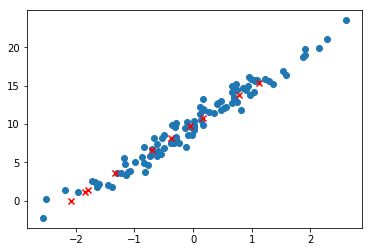

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train)

x_test = np.random.normal(size=10)
y_test = sess.run(y_model, feed_dict={x:x_test})
plt.scatter(x_test, y_test, marker='x', c='r')

## Logistic Regression

Logistic regression is a very common and simple linear model for classification purposes, based on linear regression and the logistic function:

$$y = \frac{1}{1+e^{-(w^{T}x + b)}}$$

Due to the nature of the logistic function, it produces output values in the range $[0,1]$, thus providing a probability for each class given in the output. Similar to linear regression, the variables defined within the logistic regression model are parameters trainable by various optimization algorithms.

Let us build a logistic regression for the well-known XOR problem.

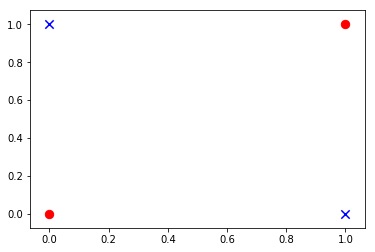

In [35]:
#generate XOR training data
import numpy as np
x_train = np.array([[0,0],[0,1],[1,0],[1,1]])
y_train = np.array([[0],[1],[1],[0]])

#import matplotlib for visualization
%matplotlib inline
import matplotlib.pyplot as plt

#logical indices of data where the outputs are 1 and 0
t = np.where(y_train==1)[0]
f = np.where(y_train==0)[0]

#scatter plot of the data
plt.scatter(x_train[t,0],x_train[t,1],c='b',marker='x',s=70)
plt.scatter(x_train[f,0],x_train[f,1],c='r',marker='o',s=70)

### Exercise:
- The model input $x$ is a placeholder for a data
- The trainable model parameters $w$ and $b$ are defined as TensorFlow Variables
- The model output $\hat{y}$ is a Tensor
- The obesrved output $y$ is also a placeholder, where output data will be provided in order to train the model

In [36]:
#define placeholders for the data
x = tf.placeholder(dtype=tf.float32,shape=[None,2])
y = tf.placeholder(dtype=tf.float32,shape=[None,1])

#define variables for the trainable parameters of the model
w = tf.Variable(tf.random_normal([2,1]),name="weights")
b = tf.Variable(tf.random_normal([1]), name="bias")

#create a tensor to calculate the model output
y_model = 1/(1+tf.exp(-(tf.matmul(x,w) + b)))

#define the loss function, create the optimizer and the training operation
loss = tf.reduce_mean(tf.square(y_model-y))
optimizer = tf.train.GradientDescentOptimizer(0.3)
train = optimizer.minimize(loss)

#train the model
sess.run(tf.global_variables_initializer())

for epoch in range(1000):
    sess.run(train,{x:x_train,y:y_train})
    print('w:',sess.run(w,{y:y_train,x:x_train}),', b:',sess.run(b,{y:y_train,x:x_train}),', loss:',sess.run(loss,{y:y_train,x:x_train}))


w: [[0.34090206]
 [0.3295543 ]] , b: [1.4045674] , loss: 0.36965334
w: [[0.3305153 ]
 [0.31921765]] , b: [1.3779929] , loss: 0.36656198
w: [[0.31987685]
 [0.30863157]] , b: [1.35113] , loss: 0.3633845
w: [[0.30898687]
 [0.29779625]] , b: [1.323992] , loss: 0.36012194
w: [[0.29784688]
 [0.28671327]] , b: [1.2965945] , loss: 0.35677642
w: [[0.28645998]
 [0.27538583]] , b: [1.2689558] , loss: 0.3533507
w: [[0.27483115]
 [0.26381895]] , b: [1.2410972] , loss: 0.34984857
w: [[0.26296732]
 [0.25201964]] , b: [1.2130431] , loss: 0.3462748
w: [[0.25087777]
 [0.2399972 ]] , b: [1.1848211] , loss: 0.3426355
w: [[0.23857415]
 [0.22776332]] , b: [1.1564623] , loss: 0.33893797
w: [[0.22607079]
 [0.21533237]] , b: [1.1280013] , loss: 0.33519062
w: [[0.21338487]
 [0.20272149]] , b: [1.0994765] , loss: 0.3314035
w: [[0.20053643]
 [0.18995073]] , b: [1.0709293] , loss: 0.32758766
w: [[0.18754855]
 [0.17704314]] , b: [1.042405] , loss: 0.32375595
w: [[0.17444725]
 [0.16402468]] , b: [1.0139519] , loss: 

w: [[-0.13170932]
 [-0.13487758]] , b: [0.16375639] , loss: 0.2505943
w: [[-0.13100435]
 [-0.13414203]] , b: [0.16279036] , loss: 0.2505877
w: [[-0.13030171]
 [-0.13340911]] , b: [0.16183157] , loss: 0.25058126
w: [[-0.12960148]
 [-0.1326789 ]] , b: [0.16087987] , loss: 0.25057483
w: [[-0.1289037 ]
 [-0.13195144]] , b: [0.15993509] , loss: 0.2505685
w: [[-0.12820846]
 [-0.13122681]] , b: [0.1589971] , loss: 0.25056222
w: [[-0.12751581]
 [-0.13050506]] , b: [0.15806577] , loss: 0.250556
w: [[-0.12682578]
 [-0.12978622]] , b: [0.15714096] , loss: 0.25054985
w: [[-0.12613843]
 [-0.12907034]] , b: [0.15622255] , loss: 0.25054377
w: [[-0.1254538 ]
 [-0.12835746]] , b: [0.15531044] , loss: 0.25053775
w: [[-0.12477193]
 [-0.12764762]] , b: [0.1544045] , loss: 0.25053182
w: [[-0.12409285]
 [-0.12694085]] , b: [0.15350465] , loss: 0.25052595
w: [[-0.1234166 ]
 [-0.12623717]] , b: [0.15261078] , loss: 0.2505201
w: [[-0.12274321]
 [-0.12553662]] , b: [0.15172279] , loss: 0.25051436
w: [[-0.122072

 [-0.0597036 ]] , b: [0.07127243] , loss: 0.25011745
w: [[-0.05856364]
 [-0.05935878]] , b: [0.07085729] , loss: 0.2501161
w: [[-0.05822831]
 [-0.0590159 ]] , b: [0.07044455] , loss: 0.2501148
w: [[-0.05789484]
 [-0.05867496]] , b: [0.07003418] , loss: 0.2501135
w: [[-0.05756322]
 [-0.05833595]] , b: [0.06962617] , loss: 0.25011218
w: [[-0.05723345]
 [-0.05799885]] , b: [0.06922052] , loss: 0.25011086
w: [[-0.05690552]
 [-0.05766366]] , b: [0.0688172] , loss: 0.2501096
w: [[-0.05657942]
 [-0.05733037]] , b: [0.0684162] , loss: 0.25010833
w: [[-0.05625513]
 [-0.05699896]] , b: [0.06801751] , loss: 0.2501071
w: [[-0.05593266]
 [-0.05666944]] , b: [0.0676211] , loss: 0.25010586
w: [[-0.05561198]
 [-0.05634177]] , b: [0.06722699] , loss: 0.25010467
w: [[-0.05529309]
 [-0.05601596]] , b: [0.06683514] , loss: 0.25010347
w: [[-0.05497597]
 [-0.05569199]] , b: [0.06644557] , loss: 0.2501023
w: [[-0.05466064]
 [-0.05536987]] , b: [0.06605822] , loss: 0.25010112
w: [[-0.05434706]
 [-0.05504957]]

w: [[-0.0244101 ]
 [-0.02459977]] , b: [0.0292264] , loss: 0.2500201
w: [[-0.02426809]
 [-0.02445597]] , b: [0.02905503] , loss: 0.25001985
w: [[-0.02412689]
 [-0.024313  ]] , b: [0.02888466] , loss: 0.2500196
w: [[-0.0239865 ]
 [-0.02417086]] , b: [0.02871528] , loss: 0.25001937
w: [[-0.02384691]
 [-0.02402954]] , b: [0.02854689] , loss: 0.25001916
w: [[-0.02370814]
 [-0.02388905]] , b: [0.02837948] , loss: 0.25001892
w: [[-0.02357017]
 [-0.02374937]] , b: [0.02821305] , loss: 0.25001872
w: [[-0.02343298]
 [-0.0236105 ]] , b: [0.0280476] , loss: 0.2500185
w: [[-0.02329658]
 [-0.02347244]] , b: [0.02788311] , loss: 0.25001827
w: [[-0.02316097]
 [-0.02333517]] , b: [0.02771959] , loss: 0.2500181
w: [[-0.02302615]
 [-0.02319871]] , b: [0.02755701] , loss: 0.25001782
w: [[-0.0228921 ]
 [-0.02306303]] , b: [0.0273954] , loss: 0.25001764
w: [[-0.02275882]
 [-0.02292814]] , b: [0.02723472] , loss: 0.2500174
w: [[-0.0226263 ]
 [-0.02279403]] , b: [0.02707499] , loss: 0.25001726
w: [[-0.022494

w: [[-0.00934006]
 [-0.00938034]] , b: [0.01112597] , loss: 0.25000292
w: [[-0.00928536]
 [-0.00932526]] , b: [0.01106057] , loss: 0.25000292
w: [[-0.00923097]
 [-0.0092705 ]] , b: [0.01099556] , loss: 0.25000286
w: [[-0.0091769 ]
 [-0.00921605]] , b: [0.01093093] , loss: 0.25000283
w: [[-0.00912314]
 [-0.00916193]] , b: [0.01086668] , loss: 0.2500028
w: [[-0.0090697 ]
 [-0.00910812]] , b: [0.01080281] , loss: 0.25000277
w: [[-0.00901656]
 [-0.00905463]] , b: [0.01073932] , loss: 0.25000274
w: [[-0.00896374]
 [-0.00900145]] , b: [0.01067619] , loss: 0.25000268
w: [[-0.00891123]
 [-0.00894858]] , b: [0.01061344] , loss: 0.25000265
w: [[-0.00885902]
 [-0.00889602]] , b: [0.01055106] , loss: 0.25000262
w: [[-0.00880711]
 [-0.00884377]] , b: [0.01048904] , loss: 0.25000262
w: [[-0.00875552]
 [-0.00879183]] , b: [0.01042739] , loss: 0.25000256
w: [[-0.00870422]
 [-0.00874018]] , b: [0.0103661] , loss: 0.2500025
w: [[-0.00865322]
 [-0.00868885]] , b: [0.01030517] , loss: 0.2500025
w: [[-0.00

w: [[-0.00419667]
 [-0.00420783]] , b: [0.00498918] , loss: 0.2500006
w: [[-0.00417203]
 [-0.00418308]] , b: [0.00495984] , loss: 0.2500006
w: [[-0.00414753]
 [-0.00415848]] , b: [0.00493067] , loss: 0.2500006
w: [[-0.00412318]
 [-0.00413403]] , b: [0.00490166] , loss: 0.25000057
w: [[-0.00409897]
 [-0.00410971]] , b: [0.00487283] , loss: 0.25000057
w: [[-0.0040749 ]
 [-0.00408554]] , b: [0.00484417] , loss: 0.25000057
w: [[-0.00405098]
 [-0.00406152]] , b: [0.00481568] , loss: 0.2500006
w: [[-0.00402719]
 [-0.00403764]] , b: [0.00478735] , loss: 0.25000054
w: [[-0.00400354]
 [-0.00401389]] , b: [0.00475919] , loss: 0.25000054
w: [[-0.00398004]
 [-0.00399029]] , b: [0.0047312] , loss: 0.2500005
w: [[-0.00395667]
 [-0.00396682]] , b: [0.00470337] , loss: 0.2500005
w: [[-0.00393343]
 [-0.00394349]] , b: [0.00467571] , loss: 0.25000054
w: [[-0.00391034]
 [-0.0039203 ]] , b: [0.0046482] , loss: 0.2500005
w: [[-0.00388737]
 [-0.00389724]] , b: [0.00462086] , loss: 0.25000054
w: [[-0.0038645

w: [[-0.00181766]
 [-0.00182058]] , b: [0.00215862] , loss: 0.25000012
w: [[-0.00180698]
 [-0.00180987]] , b: [0.00214592] , loss: 0.25000012
w: [[-0.00179636]
 [-0.00179922]] , b: [0.00213329] , loss: 0.25000012
w: [[-0.0017858 ]
 [-0.00178863]] , b: [0.00212074] , loss: 0.2500001
w: [[-0.0017753 ]
 [-0.00177811]] , b: [0.00210827] , loss: 0.25000012
w: [[-0.00176486]
 [-0.00176764]] , b: [0.00209586] , loss: 0.25000012
w: [[-0.00175448]
 [-0.00175724]] , b: [0.00208353] , loss: 0.25000012
w: [[-0.00174418]
 [-0.00174691]] , b: [0.00207127] , loss: 0.2500001
w: [[-0.00173392]
 [-0.00173662]] , b: [0.00205909] , loss: 0.2500001
w: [[-0.00172372]
 [-0.00172641]] , b: [0.00204698] , loss: 0.2500001
w: [[-0.00171359]
 [-0.00171625]] , b: [0.00203493] , loss: 0.25000012
w: [[-0.00170352]
 [-0.00170615]] , b: [0.00202296] , loss: 0.25000012
w: [[-0.0016935 ]
 [-0.00169611]] , b: [0.00201106] , loss: 0.2500001
w: [[-0.00168355]
 [-0.00168613]] , b: [0.00199922] , loss: 0.2500001
w: [[-0.0016

w: [[-0.00091172]
 [-0.00091269]] , b: [0.00108225] , loss: 0.25000003
w: [[-0.00090636]
 [-0.00090732]] , b: [0.00107588] , loss: 0.25
w: [[-0.00090103]
 [-0.00090198]] , b: [0.00106955] , loss: 0.25
w: [[-0.00089572]
 [-0.00089666]] , b: [0.00106326] , loss: 0.25
w: [[-0.00089045]
 [-0.00089138]] , b: [0.00105701] , loss: 0.25
w: [[-0.00088521]
 [-0.00088614]] , b: [0.0010508] , loss: 0.25
w: [[-0.00088   ]
 [-0.00088092]] , b: [0.00104462] , loss: 0.25
w: [[-0.00087482]
 [-0.00087573]] , b: [0.00103848] , loss: 0.25000003
w: [[-0.00086967]
 [-0.00087057]] , b: [0.00103237] , loss: 0.25000003
w: [[-0.00086456]
 [-0.00086545]] , b: [0.0010263] , loss: 0.25000003
w: [[-0.00085948]
 [-0.00086036]] , b: [0.00102025] , loss: 0.25
w: [[-0.00085442]
 [-0.00085529]] , b: [0.00101425] , loss: 0.25000003
w: [[-0.0008494 ]
 [-0.00085026]] , b: [0.00100828] , loss: 0.25000003
w: [[-0.00084441]
 [-0.00084525]] , b: [0.00100235] , loss: 0.25
w: [[-0.00083944]
 [-0.00084028]] , b: [0.00099646] , lo

Inspect the trained model parameters and the model outputs. What is the minimum found by the optimizer?

In [37]:
print(sess.run(y_model, {x:x_train}))

[[0.50024766]
 [0.5000388 ]
 [0.50003904]
 [0.4998302 ]]


## Multilayer Perceptron

A multilayer perceptron is a feedforward network that can be thought of a model composed of multiple nested functions, for instance:

$$y = f^{(3)}(f^{(2)}(f^{(1)}(x)))$$

This means that the output of each function is routed as the input of the next function, and this operational and data flow is strictly one-directional (thus "feedforward") and may contain multiple layers of nested functions (thus "deep"). TensorFlow is a very suitable tool for building and training such models. Here we will consider the XOR problem once again, and build a multilayer perceptron to classify the data correctly.

It was demonstrated previously that the XOR data are not linearly separable - this means that a non-linear layer (function) within the model is needed to tranform the problem to a linearly separable space. This is in fact the core of the multilayer perceptron as well as other deep learning models - nonlinear activation functions such as the logistic function, $tanh$, or ReLU. A comprehensive guide for TensorFlow supported functions can be found in: https://www.tensorflow.org/versions/r0.12/api_docs/python/nn/activation_functions_.

Let us build a multilayer perceptron model where the sigmoid activation function is used for the hiddern layer. Let:
- $f^{(1)}(x) = W^{(1)}x + b^{(1)}$
- $f^{(2)}(x) = {1}/({1+e^{-x}})$
- $f^{(3)}(x) = W^{(2)}x + b^{(2)}$

with $W^{(1)} \in \mathbb{R}^{2\times 2}$, $b^{(1)} \in \mathbb{R}^{2\times 1}$, $W^{(2)} \in \mathbb{R}^{2\times 1}$, and $b^{(2)} \in \mathbb{R}$. 


In [38]:
sess = tf.Session()

x_train = np.array([[0,0],[0,1],[1,0],[1,1]])
y_train = np.array([[0],[1],[1],[0]])

X = tf.placeholder(tf.float32,[None,2])
y = tf.placeholder(tf.float32,[None,1])

W1 = tf.Variable(tf.random_uniform([2,2]),name="weights1")
b1 = tf.Variable(tf.random_uniform([2]), name="bias1")

W2 = tf.Variable(tf.random_uniform([2,1]),name="weights2")
b2 = tf.Variable(tf.random_uniform([1]), name="bias2")

f1 = tf.matmul(X,W1)+b1
f2 = tf.nn.sigmoid(f1)
y_model = tf.matmul(f2,W2)+b2

loss = tf.reduce_mean(tf.square(y_model-y))

optimizer = tf.train.GradientDescentOptimizer(0.35)
#optimizer = tf.train.AdamOptimizer(0.1)
train = optimizer.minimize(loss)

sess.run(tf.global_variables_initializer())

for epoch in range(1000):
    sess.run(train, feed_dict={X: x_train, y: y_train})
    print("loss:", sess.run(loss,{X: x_train, y: y_train}))


loss: 0.33901232
loss: 0.25959393
loss: 0.24947168
loss: 0.24806148
loss: 0.24784693
loss: 0.24779053
loss: 0.24775524
loss: 0.24772255
loss: 0.24769004
loss: 0.24765733
loss: 0.24762443
loss: 0.24759127
loss: 0.24755791
loss: 0.24752428
loss: 0.24749044
loss: 0.24745633
loss: 0.24742198
loss: 0.24738733
loss: 0.24735253
loss: 0.2473174
loss: 0.24728203
loss: 0.2472464
loss: 0.2472105
loss: 0.24717435
loss: 0.24713787
loss: 0.24710119
loss: 0.24706419
loss: 0.2470269
loss: 0.2469894
loss: 0.24695158
loss: 0.24691342
loss: 0.24687502
loss: 0.24683627
loss: 0.2467973
loss: 0.24675795
loss: 0.24671835
loss: 0.24667846
loss: 0.24663818
loss: 0.24659765
loss: 0.24655679
loss: 0.24651559
loss: 0.24647404
loss: 0.24643221
loss: 0.24639007
loss: 0.24634753
loss: 0.24630472
loss: 0.24626155
loss: 0.24621806
loss: 0.24617411
loss: 0.2461299
loss: 0.24608535
loss: 0.24604045
loss: 0.2459951
loss: 0.24594948
loss: 0.24590349
loss: 0.24585709
loss: 0.24581033
loss: 0.24576315
loss: 0.24571565
loss:

loss: 0.11392321
loss: 0.11307158
loss: 0.112215504
loss: 0.11135514
loss: 0.11049047
loss: 0.1096216
loss: 0.108748585
loss: 0.1078715
loss: 0.106990434
loss: 0.10610548
loss: 0.10521671
loss: 0.10432423
loss: 0.103428036
loss: 0.10252846
loss: 0.10162529
loss: 0.10071898
loss: 0.09980927
loss: 0.09889651
loss: 0.09798084
loss: 0.097062156
loss: 0.09614076
loss: 0.095216766
loss: 0.09429012
loss: 0.09336122
loss: 0.09243013
loss: 0.091496825
loss: 0.09056166
loss: 0.089624576
loss: 0.088685825
loss: 0.08774567
loss: 0.08680405
loss: 0.08586122
loss: 0.08491731
loss: 0.08397264
loss: 0.08302708
loss: 0.08208107
loss: 0.08113471
loss: 0.08018795
loss: 0.07924145
loss: 0.07829471
loss: 0.07734858
loss: 0.07640276
loss: 0.07545774
loss: 0.074513495
loss: 0.07357034
loss: 0.07262843
loss: 0.07168781
loss: 0.07074894
loss: 0.06981181
loss: 0.06887665
loss: 0.06794366
loss: 0.06701311
loss: 0.066084936
loss: 0.065159634
loss: 0.064237274
loss: 0.06331803
loss: 0.062402084
loss: 0.06148967
lo

The first layer $f^{(1)}(x) = W^{(1)}x + b^{(1)}$ is a linear transformation of the input, and thus cannot transform the XOR problem to a linearly separable space. Let us inspect the trained parameters $W^{(1)}$ and $b^{(1)}$, and the output of the first layer.  

[[3.4680705 1.4763952]
 [3.4897923 1.4806385]] 

[-0.5380751 -2.001331 ] 

[[-0.5380751  -2.001331  ]
 [ 2.9517174  -0.5206926 ]
 [ 2.9299955  -0.52493584]
 [ 6.419788    0.95570254]] 



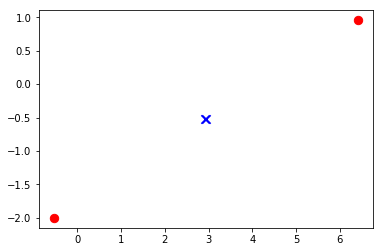

In [39]:
print(sess.run(W1),'\n')
print(sess.run(b1),'\n')

f1_out = sess.run(f1,{X: x_train, y: y_train})
print(f1_out,'\n')

plt.scatter(f1_out[t,0],f1_out[t,1],c='b',marker='x',s=70)
plt.scatter(f1_out[f,0],f1_out[f,1],c='r',marker='o',s=70)

The next layer $f^{(2)}(x)$ is the sigmoid function, which is a nonlinear transformation of the input, thus providing the possibility of transforming the problem to a new space where the outputs could be linearly separable.

[[0.36863548 0.11906324]
 [0.95034456 0.3726903 ]
 [0.94930947 0.37169877]
 [0.9983736  0.7222606 ]]


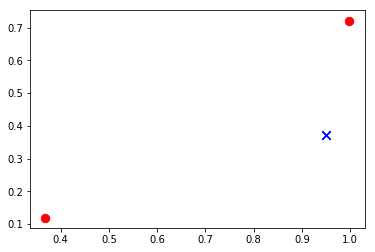

In [40]:
f2_out = sess.run(f2,{X: x_train, y: y_train})
print(f2_out)

plt.scatter(f2_out[t,0],f2_out[t,1],c='b',marker='x',s=70)
plt.scatter(f2_out[f,0],f2_out[f,1],c='r',marker='o',s=70)

The final layer is the model output:

In [41]:
print("y: ",sess.run(y,{X: x_train, y: y_train}),"\n")
print("model: ",sess.run(y_model,{X: x_train, y: y_train}))

y:  [[0.]
 [1.]
 [1.]
 [0.]] 

model:  [[2.4479628e-04]
 [9.9962395e-01]
 [9.9962360e-01]
 [5.4389238e-04]]


The network seems to have learned to classify the XOR problem correctly, thanks to the multi-layered structure and the non-linear activation function in the hidden layer. This example embodies the some of the primary reasons for employing deep learning models, especially for highly non-linear problems where traditional linear approaches fail.

In [45]:
#Testing
#X = [0,1]
print("y:", sess.run(y_model, {X:[[0,0]]}))

y: [[0.00024468]]
